In [ ]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import sklearn.metrics as sm



In [ ]:
# Load the Iris dataset
iris = datasets.load_iris()

print (iris.data [0:5])

print (iris.target_names)

print (iris.target)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
['setosa' 'versicolor' 'virginica']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [ ]:


# Create a DataFrame for the data and target
data = pd.DataFrame(iris.data, columns=['SL', 'SW', 'PL', 'PW'])  # Short names for features
target = pd.DataFrame(iris.target, columns=['Target'])

# Define colors and patches for the legend
colors = np.array(['red', 'green', 'blue'])
red_patch = mpatches.Patch(color='red', label='Setosa')
green_patch = mpatches.Patch(color='green', label='Versicolor')
blue_patch = mpatches.Patch(color='blue', label='Virginica')






In [ ]:
x.head()

,SL,SW,PL,PW
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
y.head()

,Target
0,0
1,0
2,0
3,0
4,0


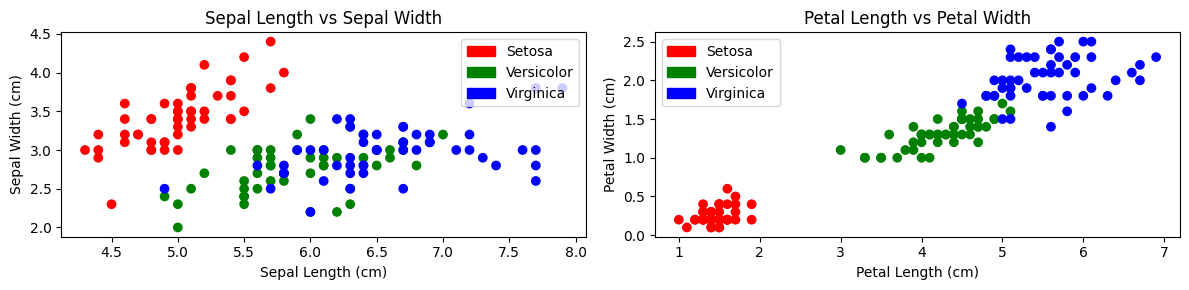

In [ ]:

# Create subplots
plt.figure(figsize=(12, 3))

# Subplot 1: Sepal Length vs Sepal Width
plt.subplot(1, 2, 1)
plt.scatter(data['SL'], data['SW'], c=colors[target['Target']])
plt.title('Sepal Length vs Sepal Width')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend(handles=[red_patch, green_patch, blue_patch])

# Subplot 2: Petal Length vs Petal Width
plt.subplot(1, 2, 2)
plt.scatter(data['PL'], data['PW'], c=colors[target['Target']])
plt.title('Petal Length vs Petal Width')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.legend(handles=[red_patch, green_patch, blue_patch])

# Show the plots
plt.tight_layout()
plt.show()


In [ ]:
iris_k_mean_model = KMeans(n_clusters =3) # we set K = 3
iris_k_mean_model.fit(x) # trained using the entire dataset

KMeans(n_clusters=3)

In [ ]:
print(iris_k_mean_model.predict(x))

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


In [ ]:
print (iris_k_mean_model.cluster_centers_)

[[6.85384615 3.07692308 5.71538462 2.05384615]
 [5.006      3.428      1.462      0.246     ]
 [5.88360656 2.74098361 4.38852459 1.43442623]]


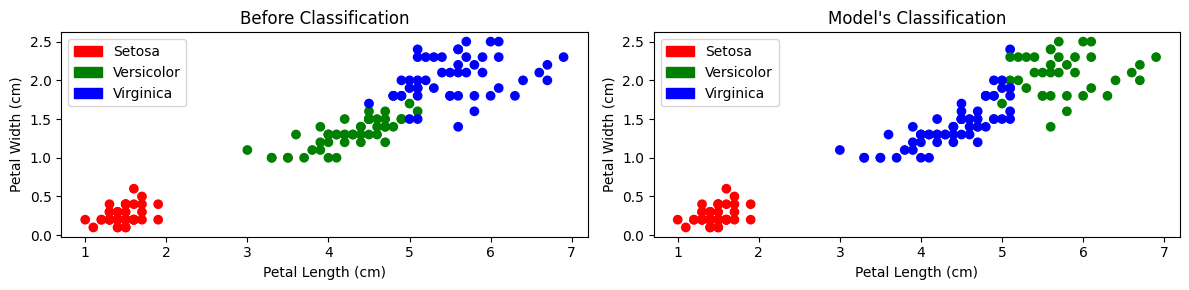

In [ ]:


# Set up the figure and subplots
plt.figure(figsize=(12, 3))

# Subplot 1: True labels
plt.subplot(1, 2, 1)
plt.scatter(data['PL'], data['PW'], c=colors[target['Target']])
plt.title('Before Classification')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.legend(handles=[red_patch, green_patch, blue_patch])

# Subplot 2: Predicted labels from K-Means
plt.subplot(1, 2, 2)
plt.scatter(data['PL'], data['PW'], c=colors[predictedY])
plt.title("Model's Classification")
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.legend(handles=[red_patch, green_patch, blue_patch])

# Show the plots
plt.tight_layout()
plt.show()


In [ ]:
sm.accuracy_score(predictedY , y['Target'])



0.44666666666666666

In [ ]:
import sklearn.metrics as sm

# Compute the confusion matrix
conf_matrix = sm.confusion_matrix(target['Target'], predictedY)

# Display the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)


# Confusion Matrix:
# [[50  0  0] correoct=50
#  [ 0  3 47] correct=3
#  [ 0 36 14]] correct=36

Confusion Matrix:
[[50  0  0]
 [ 0  3 47]
 [ 0 36 14]]


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, accuracy_score
import numpy as np

# Load the Iris dataset
iris = load_iris()
data = iris.data
labels = iris.target  # True labels

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.3, random_state=42)

# Train KMeans model on training data
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_train)

# Adjust predicted labels to match the true labels' mapping
train_predicted = np.choose(kmeans.labels_, [1, 0, 2]).astype(np.int64)
test_predicted = np.choose(kmeans.predict(X_test), [1, 0, 2]).astype(np.int64)

# Evaluate performance on training set
train_conf_matrix = confusion_matrix(y_train, train_predicted)
train_accuracy = accuracy_score(y_train, train_predicted)

# Evaluate performance on testing set
test_conf_matrix = confusion_matrix(y_test, test_predicted)
test_accuracy = accuracy_score(y_test, test_predicted)

# Display results
print("Training Set Performance:")
print("Confusion Matrix:\n", train_conf_matrix)
print("Accuracy:", train_accuracy)

print("\nTesting Set Performance:")
print("Confusion Matrix:\n", test_conf_matrix)
print("Accuracy:", test_accuracy)


Using Sepal Length and Petal Width Features

Training Set Performance:
Confusion Matrix:
 [[31  0  0]
 [ 3  6 28]
 [ 0 26 11]]
Accuracy: 0.45714285714285713

Testing Set Performance:
Confusion Matrix:
 [[19  0  0]
 [ 0  3 10]
 [ 0 11  2]]
Accuracy: 0.5333333333333333


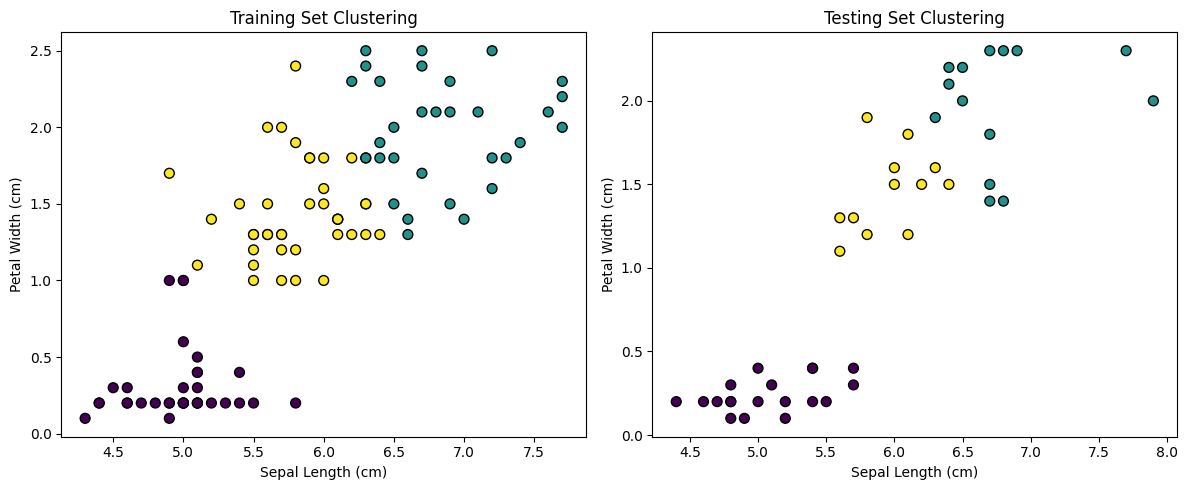

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
data = pd.DataFrame(iris.data, columns=['SL', 'SW', 'PL', 'PW'])  # Feature names
labels = iris.target  # True labels

# Select only Sepal Length (SL) and Petal Width (PW)
selected_features = data[['SL', 'PW']]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(selected_features, labels, test_size=0.3, random_state=42)

# Train KMeans model using Sepal Length and Petal Width
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_train)

# Adjust predicted labels to match the true labels
train_predicted = np.choose(kmeans.labels_, [1, 0, 2]).astype(np.int64)
test_predicted = np.choose(kmeans.predict(X_test), [1, 0, 2]).astype(np.int64)

# Evaluate performance on training set
train_conf_matrix = confusion_matrix(y_train, train_predicted)
train_accuracy = accuracy_score(y_train, train_predicted)

# Evaluate performance on testing set
test_conf_matrix = confusion_matrix(y_test, test_predicted)
test_accuracy = accuracy_score(y_test, test_predicted)

# Display results
print("Using Sepal Length and Petal Width Features\n")
print("Training Set Performance:")
print("Confusion Matrix:\n", train_conf_matrix)
print("Accuracy:", train_accuracy)

print("\nTesting Set Performance:")
print("Confusion Matrix:\n", test_conf_matrix)
print("Accuracy:", test_accuracy)

# Visualize results
plt.figure(figsize=(12, 5))

# Plot training set
plt.subplot(1, 2, 1)
plt.scatter(X_train['SL'], X_train['PW'], c=train_predicted, cmap='viridis', edgecolor='k', s=50)
plt.title('Training Set Clustering')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Width (cm)')

# Plot testing set
plt.subplot(1, 2, 2)
plt.scatter(X_test['SL'], X_test['PW'], c=test_predicted, cmap='viridis', edgecolor='k', s=50)
plt.title('Testing Set Clustering')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Width (cm)')

plt.tight_layout()
plt.show()


# from sklearn.model_selection import train_test_split
# from sklearn.cluster import KMeans
# from sklearn.metrics import confusion_matrix, accuracy_score
# import matplotlib.pyplot as plt
# import numpy as np
# import pandas as pd

# # Load your dataset
# data = pd.read_csv('your_dataset.csv')  # Replace with your dataset's path

# # Ensure your dataset has numeric features and a label column
# # Replace 'Feature1', 'Feature2', and 'Label' with actual column names
# selected_features = data[['Feature1', 'Feature2']]  # Replace with relevant feature names
# labels = data['Label']  # Replace with the actual label column name

# # Split the dataset into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(selected_features, labels, test_size=0.3, random_state=42)

# # Train KMeans model using the selected features
# kmeans = KMeans(n_clusters=3, random_state=42)
# kmeans.fit(X_train)

# # Adjust predicted labels to match the true labels
# train_predicted = np.choose(kmeans.labels_, [1, 0, 2]).astype(np.int64)
# test_predicted = np.choose(kmeans.predict(X_test), [1, 0, 2]).astype(np.int64)

# # Evaluate performance on training set
# train_conf_matrix = confusion_matrix(y_train, train_predicted)
# train_accuracy = accuracy_score(y_train, train_predicted)

# # Evaluate performance on testing set
# test_conf_matrix = confusion_matrix(y_test, test_predicted)
# test_accuracy = accuracy_score(y_test, test_predicted)

# # Display results
# print("Using Selected Features from Your Dataset\n")
# print("Training Set Performance:")
# print("Confusion Matrix:\n", train_conf_matrix)
# print("Accuracy:", train_accuracy)

# print("\nTesting Set Performance:")
# print("Confusion Matrix:\n", test_conf_matrix)
# print("Accuracy:", test_accuracy)

# # Visualize results
# plt.figure(figsize=(12, 5))

# # Plot training set
# plt.subplot(1, 2, 1)
# plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=train_predicted, cmap='viridis', edgecolor='k', s=50)
# plt.title('Training Set Clustering')
# plt.xlabel('Feature 1')
# plt.ylabel('Feature 2')

# # Plot testing set
# plt.subplot(1, 2, 2)
# plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=test_predicted, cmap='viridis', edgecolor='k', s=50)
# plt.title('Testing Set Clustering')
# plt.xlabel('Feature 1')
# plt.ylabel('Feature 2')

# plt.tight_layout()
# plt.show()

In [ ]:
# Use your own dataset (done previously) to perform K-means clustering.